### 작은 부분부터 작성해서 하나씩 구현하기

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="4em">프로그래밍 연습</font></strong><br>
어떤 데이터리스트가 있을 때 리스트를 앞뒤로 짜르는 코드 작성해보기 (일반화)
</div>

In [10]:
def split_func(data):
    medium = int(len(data) / 2)
    print (medium)
    left = data[:medium]
    right = data[medium:]
    print (left, right)

In [11]:
split_func([1, 5, 3, 2, 4])

2
[1, 5] [3, 2, 4]


### 재귀용법 활용하기

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="4em">프로그래밍 연습</font></strong><br>
</div>
<pre>
다음 문장을 코드로 작성해보기 (merge함수는 아직은 없는 상태, 있다고만 가정)
* mergesplit 함수 만들기
  - 만약 리스트 갯수가 한개이면 해당 값 리턴
  - 그렇지 않으면, 리스트를 앞뒤, 두 개로 나누기
  - left = mergesplit(앞)
  - right = mergesplit(뒤)
  - merge(left, right)
</pre>

In [13]:
def mergesplit(data):
    if len(data) <= 1:
        return data
    medium = int(len(data) / 2)
    left = mergesplit(data[:medium])
    right = mergesplit(data[medium:])
    return merge(left, right)

### merge 함수 만들기
* 목표: left 와 right 의 리스트 데이터를 정렬해서 sorted_list 라는 이름으로 return 하기
* left와 right는 이미 정렬된 상태 또는 데이터가 하나임

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="4em">프로그래밍 연습</font></strong><br>
</div>

1. left 부터 하나씩 right과 비교
2. left > right 이면, left 를 sorted_list에 넣고, 다음 left 리스트와 right 비교
   - 그렇지않으면 반대로 하기
<pre>
다음 경우만 프로그래밍으로 작성해보기
left = [0]
right = [3]
결과는 별도의 리스트 변수를 만들어 적은 숫자 순으로 순서대로 저장해서 리턴
</pre>

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="4em">프로그래밍 연습</font></strong><br>
</div>
<pre>
다음 경우만 프로그래밍으로 작성해보기
left = [0, 2]
right = [1]
결과는 별도의 리스트 변수를 만들어 적은 숫자 순으로 순서대로 저장해서 리턴
</pre>

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="4em">프로그래밍 연습</font></strong><br>
</div>
<pre>
다음 경우만 프로그래밍으로 작성해보기
left = [0, 2]
right = [1, 3]
결과는 별도의 리스트 변수를 만들어 적은 숫자 순으로 순서대로 저장해서 리턴
</pre>

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="4em">프로그래밍 연습</font></strong><br>
left, right 리스트 변수의 데이터 수가 한 개에서 여러 개가 될 수 있을때 작성해보기(일반화)
</div>
<pre>
1. sorted_list 리스트 변수 선언하기
2. left_index, right_index 를 0 으로 초기화 하기
3. while left_index < len(left) or right_index < len(right) 이면,
   - 만약 left_index >= len(left)이면, sorted_list 에 right[right_index] 를 추가하고, right_index 값을 1증가
   - 만약 right_index >= len(right)이면, sorted_list 에 left[left_index] 를 추가하고, left_index 값을 1증가
   - 만약 left[left_index] < right[right_index]이면, sorted_list 에 left[left_index] 를 추가하고, left_index 값을 1증가
   - 위 세가지가 아니면, sorted_list 에 right[right_index] 를 추가하고, right_index 값을 1증가
</pre>

In [18]:
def merge(left, right):
    merged = list()
    left_point, right_point = 0, 0
    
    # case1 - left/right 둘다 있을때
    while len(left) > left_point and len(right) > right_point:
        if left[left_point] > right[right_point]:
            merged.append(right[right_point])
            right_point += 1
        else:
            merged.append(left[left_point])
            left_point += 1

    # case2 - left 데이터가 없을 때
    while len(left) > left_point:
        merged.append(left[left_point])
        left_point += 1
        
    # case3 - right 데이터가 없을 때
    while len(right) > right_point:
        merged.append(right[right_point])
        right_point += 1
    
    return merged

### 최종 코드

In [20]:
import random

data_list = random.sample(range(100), 10)
mergesplit(data_list)

[8, 12, 24, 40, 47, 70, 81, 87, 92, 96]

### 4. 알고리즘 분석
* 알고리즘 분석은 쉽지 않음, <font color='#BF360C'>이 부분은 참고로만 알아두자.</font>
  - 다음을 보고 이해해보자
    - 몇 단계 깊이까지 만들어지는지를 depth 라고 하고 i로 놓자. 맨 위 단계는 0으로 놓자.
      - 다음 그림에서 n/$2^2$ 는 2단계 깊이라고 해보자.
      - 각 단계에 있는 하나의 노드 안의 리스트 길이는 n/$2^2$ 가 된다.
      - 각 단계에는 $2^i$ 개의 노드가 있다.
    - 따라서, 각 단계는 항상 <font size=4em>$2^i * \frac { n }{ 2^i } = O(n)$</font>
    - 단계는 항상 $log_2 n$ 개 만큼 만들어짐, 시간 복잡도는 결국 O(log n), 2는 역시 상수이므로 삭제
    - 따라서, 단계별 시간 복잡도 O(n) * O(log n) = O(n log n)

<img src="https://www.fun-coding.org/00_Images/mergesortcomplexity.png" />
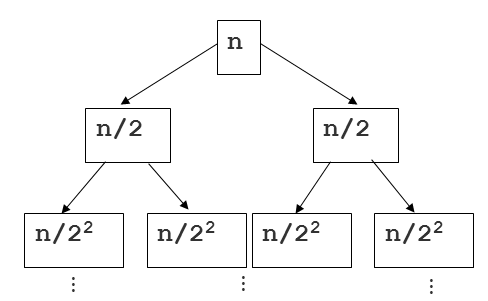

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="4em">프로그래밍 연습</font></strong><br>
지금 설명한 병합 정렬을 지금 다시 스스로 작성해보세요<br>
</div>